In [76]:
import string;
import gensim
from gensim import corpora, models
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from stop_words import get_stop_words
from gensim.models import CoherenceModel
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

import pyLDAvis
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline

# We import sklearn.
import sklearn

import time

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nolanmccafferty/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [77]:
docs = []
titles = []
locations = []
lines = ''
title = ''
location = ''

In [78]:
with open('software_engineer_1000_similar.txt', 'r') as rf:
    for line in rf:
        if location == '':
            location = line[:-1]
            locations.append(location)
        if title == '':
            title = line[:-1]
            titles.append(title)
            location = ''
        if line == 'zzz\n':
            docs.append(lines)
            lines = ''
            title = ''
            location = ''
        else:
            lines = lines+line 

In [79]:
# stop words
en_stop = get_stop_words('en')

In [80]:
# stemmer
p_stemmer = PorterStemmer()

In [81]:
documents = []

for i in docs:
    # tokenize text
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = [x.lower() for x in tokenizer.tokenize(i)]
    
    # remove stop words, numbers, and short words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop and len(i) > 3 and not i.isdigit()]
    
    # stem and lemmatize tokens
    stemmed_tokens = [p_stemmer.stem(WordNetLemmatizer().lemmatize(i, pos='v')) for i in stopped_tokens]
    
    # add tokens to list
    documents.append(stemmed_tokens)

In [82]:
# turn tokenize documents into a id - term dictionary
dictionary = corpora.Dictionary(documents)

len(dictionary)

8813

In [83]:
# filter out words that are too frequent or too infrequent
dictionary.filter_extremes(no_below=0.02, no_above=0.5, keep_n=100000)

len(dictionary)

8768

In [84]:
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(document) for document in documents]

In [85]:
# creating object for LDA model
Lda = gensim.models.ldamodel.LdaModel

def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = Lda(corpus, num_topics=num_topics, id2word=dictionary, passes=20)        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(num_topics)

    return model_list, coherence_values

In [87]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=documents, start=4, limit=16, step=2)

4
6
8
10
12
14


In [90]:
# Can take a long time to run, second half
model_list_2, coherence_values_2 = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=documents, start=16, limit=30, step=2)

16
18
20
22
24
26
28


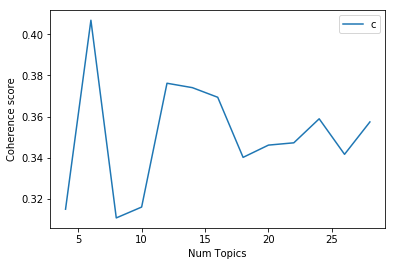

In [92]:
# Show graph
limit=30; start=4; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values + coherence_values_2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [93]:
# Print the coherence scores
for m, cv in zip(x, coherence_values + coherence_values_2):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 4  has Coherence Value of 0.315
Num Topics = 6  has Coherence Value of 0.4068
Num Topics = 8  has Coherence Value of 0.3108
Num Topics = 10  has Coherence Value of 0.316
Num Topics = 12  has Coherence Value of 0.3762
Num Topics = 14  has Coherence Value of 0.3741
Num Topics = 16  has Coherence Value of 0.3694
Num Topics = 18  has Coherence Value of 0.3402
Num Topics = 20  has Coherence Value of 0.3461
Num Topics = 22  has Coherence Value of 0.3473
Num Topics = 24  has Coherence Value of 0.3589
Num Topics = 26  has Coherence Value of 0.3417
Num Topics = 28  has Coherence Value of 0.3574


In [94]:
# choose the model with the highest Conherence value 
# num_topics = 6
optimal_model = model_list[1]

# Visualize the topics
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(optimal_model, corpus, dictionary, mds="tsne")

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2        7.682993   -1.394713       1        1  32.093258
3     -155.126587   80.189156       2        1  19.126978
4     -120.219101 -131.026566       3        1  15.606274
5       91.443329 -163.096817       4        1  13.825305
1       34.966610  178.656937       5        1  12.436997
0      187.353989   28.294754       6        1   6.911188, topic_info=     Category         Freq           Term        Total  loglift  logprob
term                                                                    
1794  Default  1076.000000          googl  1076.000000  30.0000  30.0000
178   Default   410.000000         amazon   410.000000  29.0000  29.0000
531   Default   517.000000      microsoft   517.000000  28.0000  28.0000
261   Default   360.000000         server   360.000000  27.0000  27.0000
59    Default   739.000000          statu   739.000000  26.0000  26.0000
424   Default   595.000000        partner   595.000000  25.0000  25.0000
1117  Default   190.000000      administr   190.000000  24.0000  24.0000
10    Default   224.000000       configur   224.000000  23.0000  23.0000
581   Default   278.000000          resum   278.000000  22.0000  22.0000
239   Default   616.000000        network   616.000000  21.0000  21.0000
429   Default   382.000000        protect   382.000000  20.0000  20.0000
396   Default   988.000000         employ   988.000000  19.0000  19.0000
154   Default   564.000000         market   564.000000  18.0000  18.0000
78    Default   734.000000          cloud   734.000000  17.0000  17.0000
1899  Default   227.000000          agenc   227.000000  16.0000  16.0000
64    Default   215.000000   troubleshoot   215.000000  15.0000  15.0000
61    Default  1503.000000           test  1503.000000  14.0000  14.0000
38    Default   244.000000          linux   244.000000  13.0000  13.0000
360   Default   200.000000         window   200.000000  12.0000  12.0000
391   Default   586.000000         disabl   586.000000  11.0000  11.0000
762   Default   469.000000        analyst   469.000000  10.0000  10.0000
431   Default   316.000000           race   316.000000   9.0000   9.0000
848   Default   210.000000         accept   210.000000   8.0000   8.0000
240   Default  1044.000000           oper  1044.000000   7.0000   7.0000
713   Default   809.000000       research   809.000000   6.0000   6.0000
435   Default   314.000000       religion   314.000000   5.0000   5.0000
379   Default   318.000000          color   318.000000   4.0000   4.0000
1729  Default   181.000000     regardless   181.000000   3.0000   3.0000
434   Default   232.000000         regard   232.000000   2.0000   2.0000
322   Default   796.000000          learn   796.000000   1.0000   1.0000
...       ...          ...            ...          ...      ...      ...
1134   Topic6    33.869343         migrat    62.597309   2.0578  -6.0089
360    Topic6    81.695297         window   200.100403   1.7762  -5.1284
663    Topic6    24.052658         upgrad    40.134171   2.1600  -6.3512
38     Topic6    79.922699          linux   244.667465   1.5532  -5.1504
239    Topic6   141.841385        network   616.119080   1.2033  -4.5767
1032   Topic6    54.515343          incid   142.037582   1.7144  -5.5329
31     Topic6    81.283623           issu   378.811707   1.1329  -5.1335
84     Topic6    75.466652         deploy   371.350128   1.0786  -5.2077
299    Topic6    57.348179         center   227.917618   1.2922  -5.4823
474    Topic6    75.215019  infrastructur   412.699066   0.9697  -5.2111
1139   Topic6    40.012905       procedur   128.179977   1.5078  -5.8422
531    Topic6    76.187492      microsoft   517.828918   0.7556  -5.1982
78     Topic6    87.666252          cloud   734.530823   0.5463  -5.0579
237    Topic6    72.432907           must   502.942261   0.7342  -5.2488
47     Topic6    79.372261          posit   622.981079   0.611

In [95]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=documents):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=documents)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.7643,"learn, test, platform, compani, innov, world, ...","[softwar, engin, mossvil, posit, softwar, engi..."
1,1,3.0,0.7000,"learn, test, platform, compani, innov, world, ...","[softwar, engin, cloud, python, java, amrd2087..."
2,2,2.0,0.7871,"test, secur, analyt, analysi, use, analyst, in...","[core, java, develop, york, descript, core, ja..."
3,3,2.0,0.8779,"test, secur, analyt, analysi, use, analyst, in...","[full, stack, java, engin, francisco, right, s..."
4,4,3.0,0.5045,"learn, test, platform, compani, innov, world, ...","[entri, level, softwar, engin, beaverton, entr..."
5,5,3.0,0.9955,"learn, test, platform, compani, innov, world, ...","[sync, emb, softwar, develop, supervisor, alle..."
6,6,1.0,0.3454,"amazon, test, oper, drive, write, excel, deliv...","[network, technician, data, center, seattl, am..."
7,7,2.0,0.6691,"test, secur, analyt, analysi, use, analyst, in...","[java, spring, develop, jersey, citi, descript..."
8,8,2.0,0.9904,"test, secur, analyt, analysi, use, analyst, in...","[java, microservic, develop, littleton, java, ..."
9,9,2.0,0.9818,"test, secur, analyt, analysi, use, analyst, in...","[softwar, engin, summer, intern, troy, underst..."


In [96]:
# Group top 5 sentences under each topic
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9976,"server, network, administr, configur, troubles...","[corespac, junior, system, administr, dalla, h..."
1,1.0,0.9968,"amazon, test, oper, drive, write, excel, deliv...","[manag, content, oper, seattl, content, oper, ..."
2,2.0,0.9986,"test, secur, analyt, analysi, use, analyst, in...","[java, develop, intern, washington, summaryhel..."
3,3.0,0.9973,"learn, test, platform, compani, innov, world, ...","[ccbd, technolog, back, develop, python, franc..."
4,4.0,0.9979,"employ, microsoft, statu, research, protect, d...","[intern, opportun, student, data, appli, scien..."


In [97]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head()

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,3.0,"learn, test, platform, compani, innov, world, ...",70.0,0.0699
1,3.0,"learn, test, platform, compani, innov, world, ...",128.0,0.1279
2,2.0,"test, secur, analyt, analysi, use, analyst, in...",384.0,0.3836
3,2.0,"test, secur, analyt, analysi, use, analyst, in...",211.0,0.2108
4,3.0,"learn, test, platform, compani, innov, world, ...",112.0,0.1119


In [99]:
topics = {}
vectors = []
for i,idx in enumerate(documents):
        # get the topic percentages for each document
        bow = dictionary.doc2bow(idx)
        v = optimal_model.get_document_topics(bow)
        
        # key => value, document number => topic vector
        topics[i] = v
        
        # iterate through the topic vector
        dict = {}
        for j,jdx in enumerate(v):
            # key => value, topic number => percentage of document
            dict[jdx[0]] = jdx[1]

        # give the dictionary 20 keys, one for each topic
        vector = []
        for k in range(6):
            # if the topic was in the original vector, use the given percentage
            if k in dict.keys():
                vector.append(dict[k])
            # else give the topic the percentage zero
            else:
                vector.append(0)
        # add the vector to the set of document vectors
        vectors.append(np.asarray([vector]))

In [100]:
def top_5_similar(vectors):
    for j in range(5):
        index = np.random.randint(0,len(vectors)-1)
        cosines = {}
        euclideans = {}
        for i,ind in enumerate(vectors):
            if i != index:
                cosines[sklearn.metrics.pairwise.cosine_similarity(vectors[index],vectors[i])[0][0]] = i
                euclideans[sklearn.metrics.pairwise.euclidean_distances(vectors[index],vectors[i])[0][0]] = i

        top_5_cosine = sorted(cosines.keys(), reverse=True)[:6]
        top_5_euclidean = sorted(euclideans.keys())[:6]
        print("\nTop 5 cosine similarity to:", titles[index])
        for i,indx in enumerate(top_5_cosine):
            print("  ", round(top_5_cosine[i], 3), titles[cosines[top_5_cosine[i]]])
            
        print("Lowest 5 euclidean distance from:", titles[index])
        for k,inx in enumerate(top_5_euclidean):
            print("  ", round(top_5_euclidean[k], 3), titles[euclideans[top_5_euclidean[k]]])

In [101]:
top_5_similar(vectors)


Top 5 cosine similarity to: Software Engineer Equal Opportunity
   1.0 Cyber Threat Intelligence Analyst I
   1.0 Developer II
   1.0 Back-end Java Developer
   1.0 Jr. Java Developer
   0.999 Software Engineer - Python / AWS
   0.999 Data Science Internship
Lowest 5 euclidean distance from: Software Engineer Equal Opportunity
   0.009 Developer II
   0.017 Cyber Threat Intelligence Analyst I
   0.02 Back-end Java Developer
   0.03 Jr. Java Developer
   0.032 Software Engineer - Python / AWS
   0.037 Data Science Internship

Top 5 cosine similarity to: Software Engineer
   1.0 Product Analyst
   1.0 Senior Researcher
   1.0 Analytics Developer/Analyst
   1.0 Marketing Modeler
   1.0 Penetration Tester - Application Security
   0.999 Entry Level Associate Software Engineer/Business Analyst
Lowest 5 euclidean distance from: Software Engineer
   0.015 Product Analyst
   0.023 Senior Researcher
   0.024 Analytics Developer/Analyst
   0.029 Marketing Modeler
   0.037 Penetration Tester - A

In [73]:
def top_1000_similar(vectors):
        indices = []
        index = 32535
        cosines = {}
        for i,ind in enumerate(vectors):
            if i != index:
                cosines[sklearn.metrics.pairwise.cosine_similarity(vectors[index],vectors[i])[0][0]] = i

        top_1000_cosine = sorted(cosines.keys(), reverse=True)[:1001]
        print("\nTop 10 cosine similarity to:", titles[index])
        for i,ind in enumerate(top_1000_cosine):
            print("  ", round(ind, 3), titles[cosines[ind]])
            indices.append(cosines[ind])
            
        return indices

indices = top_1000_similar(vectors)


Top 10 cosine similarity to: Sales Associate
   0.997 Sales Closers B2B
   0.996 Customer Service Representative
   0.996 Phone Sales Expert
   0.994 Entry Level sale Representative
   0.993 Concierge
   0.993 Junior Consultant
   0.993 Canvassing Manager
   0.993 Inside Sales Representative - Dating Specialist
   0.992 Inside Sales Representative - Dating Specialist
   0.992 Entry Level Medical Sales
   0.991 Call Center Customer Service Rep
   0.989 Inside Sales Representative - Dating Specialist
   0.988 Associate Orthodontist
   0.987 Inside Sales Representative - Dating Specialist
   0.987 Entry Level Marketing
   0.986 Call Center Representative
   0.986 Sales Representative
   0.985 Customer Service Representative/Call Center
   0.985 Wax Specialist
   0.985 Sales Associate/Customer Service
   0.985 Cell Phone Sales
   0.984 Inside Sales Representative
   0.984 Hiring precious metals appointment setters today!
   0.984 Business to Business Appointment Setters
   0.984 Verizon W

   0.916 Sales Rep
   0.916 Office Assistant
   0.916 Inside Sales Associate
   0.916 BDC Associate
   0.916 Wine Sales Representative
   0.916 Residential Field Sales Representative - Outside Sales
   0.916 Secretary
   0.916 Stellar Optician
   0.915 Sales Associate/Product Specialist
   0.915 Sales-no cold calls-EB-Part/Full time 70%-80% buyers
   0.915 Outside Sales Representative
   0.915 Call Center Medical Telesales Representative
   0.915 Personal Administrative Assistant/ Marketing Coordinator
   0.915 Entry Level Associate
   0.915 Front Desk Receptionist for Upscale Men's Salon
   0.915 Sales Reps Needed!
   0.915 Call Center Customer Service Representative
   0.914 Dealership Account Manager
   0.914 Inside Sales Associate
   0.914 Entry Level Sales Representative
   0.914 Brand Ambassador
   0.914 Sales Consultant
   0.914 Outside Sales Representative - B2B Medical
   0.914 Licensed Br 3 Termite Inspector ($4,500 Sign on Bonus)
   0.914 Fitness Directors & Assistant Direct

   0.888 Customer Service Representative
   0.888 Home based Call Center Representative
   0.888 Receptionist - State Farm Agent Team Member
   0.888 Solar Energy Consultant- All Levels
   0.888 Personal Assistant
   0.888 Receptionist - State Farm Agent Team Member
   0.888 Benefits Coordinator
   0.888 Receptionist - State Farm Agent Team Member
   0.888 Receptionist - State Farm Agent Team Member
   0.888 Receptionist - State Farm Agent Team Member
   0.888 Assistant Personal Training Director
   0.888 Account Representative
   0.888 Receptionist - State Farm Agent Team Member
   0.888 Water sample collector/ Surveyor
   0.888 Business Development Coordinator
   0.887 Entry Level Account Manager
   0.887 Customer Relations Specialist
   0.887 Vacation Sales Consultant
   0.887 Inside Sales Representative/ Account Manager
   0.887 In- home Sales Opportunity
   0.887 Sales Consultant
   0.887 Receptionist - State Farm Agent Team Member
   0.887 Sale Associate
   0.887 Call Center Repr

In [74]:
"""write out top 1000 similar jobs to new file"""
filename = titles[32535].replace(" ", "_") + '_1000_similar.txt'
with open(filename, 'w') as wf:
    for i in indices:
        wf.write(docs[i])
        wf.write('zzz\n')

In [75]:
filename = titles[32535].replace(" ", "_") + '_1000_similar.txt'
filename

'Sales_Associate_1000_similar.txt'